In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

# Correction - CCB épreuve d'informatique commune - PSI*/MP1

In [3]:
from random import random
from math import cos,pi,sin
from cmath import exp
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib notebook

## I. Simulation de transfert thermique dans un mur (PSI*)

## II. Dynamique gravitationnelle (MP1 et PSI*)

## III. Mesures de Houle (MP1)

## I. Simulation de transfert thermique

### Partie II. Résolution numérique

II.A.1. On peut réétablir l'équation de la chaleur ou réaliser une simple analyse dimentionnelle:
$\alpha = \frac{\rho c_p}{\lambda}$ en $s.m^{-2}$

II.A.2. A t < 0, $T_{ext} = T_{ext1}$ et le mur est en régime permanent. On a le système:
$$\left \{
\begin{array}{rcl}
a\times 0+b&=&T_{int} \\
a\times e+b&=&T_{ext1}
\end{array}
\right.$$
d'où
$$\left \{
\begin{array}{rcl}
b&=&T_{int} \\
a&=&\frac{T_{ext1} - T_{int}}{e}
\end{array}
\right .$$

II.B.1.a. On a (N+1) intervalles d'épaisseur $\Delta x$ pour une épaisseur totale $e$. D'où
$$ e = (N+1) \times \Delta x$$ et donc $$\Delta x = \frac{e}{N+1}$$

II.B.1.b. $$x_i = i\times \Delta x$$
On vérifie que cela colle pour $x_0 = 0\times \Delta x = 0$ et pour $x_{N+1} = (N+1)\times \frac{e}{N+1} = e$

II.B.2.a. $$(1)\ T(x+\Delta x,t) = T(x,t) + \Delta x \frac{\partial T}{\partial x}(x,t) + \frac{{\Delta x}^2}{2} \frac{\partial^2 T}{{\partial x}^2}(x,t) + \frac{{\Delta x}^3}{6}\frac{\partial^3 T}{{\partial x}^3}(x,t) + o({\Delta x}^3)$$
Et pour l'autre:
$$(2)\ T(x-\Delta x,t) = T(x,t) - \Delta x \frac{\partial T}{\partial x}(x,t) + \frac{{\Delta x}^2}{2} \frac{\partial^2 T}{{\partial x}^2}(x,t) - \frac{{\Delta x}^3}{6}\frac{\partial^3 T}{{\partial x}^3}(x,t) + o({\Delta x}^3)$$

II.B.2.b.  
$(1) + (2)$ nous donne:
$$T(x+\Delta x, t) + T(x - \Delta x, t) = 2 T(x,t) + {\Delta x}^2 \frac{\partial^2 T}{{\partial x}^2}(x,t) + o({\Delta x}^3)$$
Soit 
$$\frac{\partial^2 T}{{\partial x}^2}(x,t) = \frac{T(x+\Delta x, t) + T(x - \Delta x, t) - 2 T(x,t)}{{\Delta x}^2}  + o({\Delta x})$$

II.B.2.c.  
Ainsi:
$$\frac{\partial^2 T}{{\partial x}^2}(x_i,t_k) \approx \frac{T_{i-1}^k - 2 T_i^k + T_{i+1}^k}{{\Delta x}^2}$$

II.B.2.d.  
$$T(x,t+\Delta t) = T(x,t) + \Delta t \frac{\partial T}{\partial t}(x,t) + o(\Delta t)$$

II.B.2.e.  
Ainsi:
$$\frac{\partial T}{\partial t}(x,t) = \frac{T(x, t + \Delta t) - T(x,t)}{\Delta t} + o(1)$$

II.B.2.f.  
$$\frac{\partial T}{\partial t}(x_i, t_k) \approx \frac{T_i^{k+1} - T_i^k}{\Delta t}$$

II.B.2.g.  
$$\frac{\rho C_p}{\lambda}\frac{\partial T}{\partial t} = \frac{\partial^2 T}{{\partial x}^2}$$
Soit la relation approchée:
$$\frac{\rho C_p}{\lambda}\frac{T_i^{k+1} - T_i^k}{\Delta t} = \frac{T_{i-1}^k - 2 T_i^k + T_{i+1}^k}{{\Delta x}^2}$$

II.B.2.h.
On a donc:
$$T_i^{k+1} - T_i^k = \frac{\Delta t \lambda}{{\Delta x}^2 \rho C_p}(T_{i-1}^k - 2 T_i^k + T_{i+1}^k)$$
Si on pose $r = \frac{\Delta t \lambda}{{\Delta x}^2 \rho C_p} = \frac{\Delta t}{{\Delta x}^2 \alpha}$ on obtient bien:  

$$T_i^{k+1} = r T_{i-1}^k +(1 - 2r) T_i^k + r T_{i+1}^k$$

II.B.2.i. Il faut avoir accès à i, i+1 et i-1. On ne peut donc le faire que pour $0 < i < N+1$.  

Ensuite $\forall t \ge 0$ c'est à dire $\forall k$ on a $T_0^k = T_{int} = 20°C$ et $T_{N+1}^k = T_{ext2} = -10°C$



II.B.2.j.

In [4]:
def calc_norme(V): # (vi)
    s = 0
    for val in V:
        s += val**2
    return s**0.5
    
def schema_explicite(T0,Tint,Text,lamb,cp,rho,dt,dx):
    """
    (i) On a besoin de l'état initial du Mur T0 (de dim N)
    On a besoin des conditions aux limites en x = 0 et x = e
    c'est à dire Tint et Text constantes
    On a besoin de r dans l'équation calculable à partir des paramètres
    lambda, Cp, rho, delta t et delta x
    """
    r = dt * lamb / (dx**2 * rho * cp)
    assert r < 1/2, "attention r est trop grand" # (ii)
    
    N = len(T0)
    ItMax = 2000
    T_tous_k = np.zeros((N,ItMax+1)) # (iii) on stocke T0 + ItMax itérations il faut ItMax+1 colonnes
                                    # le sujet n'en demande que ItMax mais il faut soit aller jusqu'à ItMax +1 ici soit modifier
                                    # la condition de la boucle
    
    T_tous_k[:,0] = T0 # (iv)
    
    T_tous_k[0,1] = r*Tint + (1-2*r)*T0[0] + r*T0[1]
    T_tous_k[N-1,1] = r*T0[N-2] + (1-2*r)*T0[N-1] + r*Text
    for i in range(1,N-1):
        T_tous_k[i,1] = r*T0[i-1] + (1-2*r)*T0[i] + r*T0[i+1] # (v)
    
    nbIter = 1
    while nbIter < ItMax and calc_norme(T_tous_k[:,nbIter]-T_tous_k[:,nbIter-1])>1e-2:
        nbIter += 1
        T_tous_k[0,nbIter] = r*Tint + (1-2*r)*T_tous_k[0,nbIter-1] + r*T_tous_k[1,nbIter-1]
        T_tous_k[N-1,nbIter] = r*T_tous_k[N-2,nbIter-1] + (1-2*r)*T_tous_k[N-1,nbIter-1] + r*Text
        for i in range(1,N-1):
            T_tous_k[i,nbIter] = r*T_tous_k[i-1,nbIter-1] + (1-2*r)*T_tous_k[i,nbIter-1] + r*T_tous_k[i+1,nbIter-1] # (vii)
    
    return nbIter, T_tous_k # (viii)

<IPython.core.display.Javascript object>


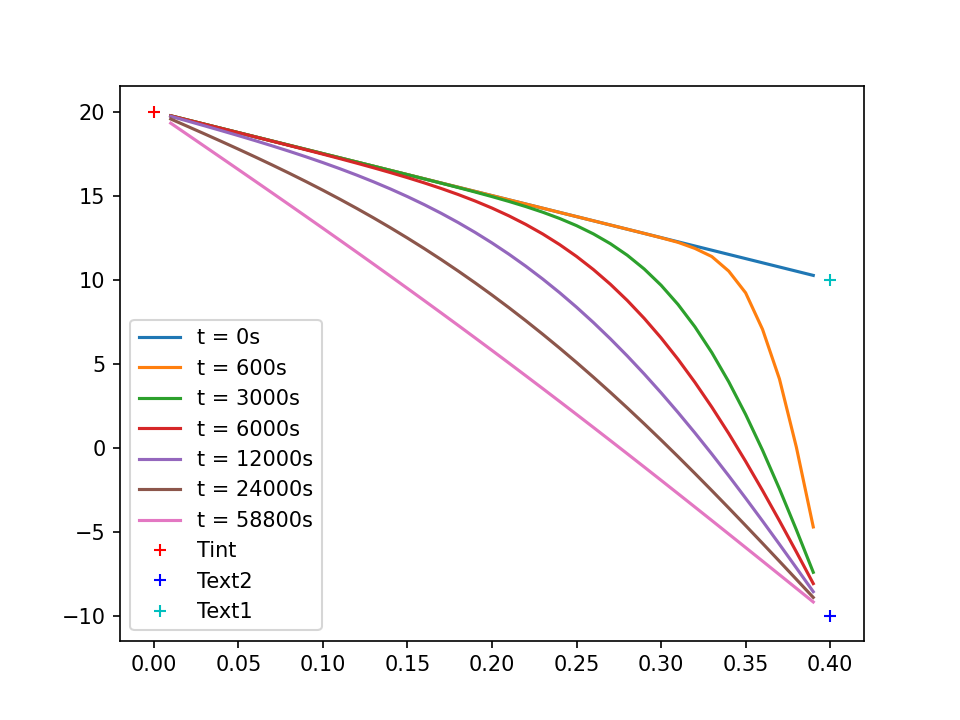

In [5]:
N = 39 # 1 point par cm

T0 = np.zeros(N)
Tint = 20
Text = 10
e = 0.4
dt = 60 # 1 point par minute
dx = e/(N+1)
for i in range(1,N+1):
    T0[i-1] = (Text-Tint)/e * i*dx + Tint # calcul de T0
    
Text = -10
lamb = 1.65
cp = 1000
rho = 2150
im, T = schema_explicite(T0, Tint, Text, lamb, cp, rho, dt, dx) # simulation


plt.figure("simulation") # affichage du profil thermique
plt.clf()
plt.plot([i*dx for i in range(1,N+1)],T0,label="t = 0s") # à t = 0

for j in (10,50,100,200,400): # à t = 10, 50, 100, 200 et 400 minutes
    plt.plot([i*dx for i in range(1,N+1)],T[:,j],label ="t = {}s".format(j*dt))
    
plt.plot([i*dx for i in range(1,N+1)],T[:,im],label = "t = {}s".format(im*dt)) # profil final

plt.plot(0,Tint,"+r",label = "Tint") # temperatures interieures et extérieures
plt.plot(e,Text,"+b", label = "Text2")
plt.plot(e,10,"+c",label= "Text1")
plt.legend()
plt.show()

## II. Dynamique gravitationnelle (MP1 et PSI*)

### Partie II. Etude de schémas numériques

II.A.1)
$$(S)
\left \{
\begin{array}{rcl}
y'(t) &=& z(t) \\
z'(t) &=& f(y(t))
\end{array}
\right.$$

II.A.2)On intègre le système (S) entre $t_i$ et $t_{i+1}$  
d'où
$$
\left \{
\begin{array}{rcl}
\int_{t_i}^{t_{i+1}}y'(t)dt &=& \int_{t_i}^{t_{i+1}}z(t)dt \\
\int_{t_i}^{t_{i+1}}z'(t)dt &=& \int_{t_i}^{t_{i+1}}f(y(t))dt
\end{array}
\right.$$
On peut intégrer exactement la partie gauche, on obtient alors:
$$
\left \{
\begin{array}{rcl}
y(t_{i+1}) - y(t_i) &=& \int_{t_i}^{t_{i+1}}z(t)dt \\
z(t_{i+1}) - z(t_i) &=& \int_{t_i}^{t_{i+1}}f(y(t))dt
\end{array}
\right.$$
d'où les deux expressions (II.3)
$$
\left \{
\begin{array}{rcl}
y(t_{i+1}) &=& y(t_i) + \int_{t_i}^{t_{i+1}}z(t)dt \\
z(t_{i+1}) &=& z(t_i) + \int_{t_i}^{t_{i+1}}f(y(t))dt
\end{array}
\right.$$

II.B.1)  
Dans ce schéma on a sur $[t_i, t_{i+1}]$, $z(t) \approx z(t_i)$ et $f(y(t)) \approx f(y(t_i))$

$$
\left \{
\begin{array}{rcl}
y(t_{i+1}) &\approx& y(t_i) + \int_{t_i}^{t_{i+1}}z(t_i)dt \\
z(t_{i+1}) &\approx& z(t_i) + \int_{t_i}^{t_{i+1}}f(y(t_i))dt
\end{array}
\right.$$
soit

$$
\left \{
\begin{array}{rcl}
y(t_{i+1}) &\approx& y(t_i) + z(t_i)\times(t_{i+1} - t_i) \\
z(t_{i+1}) &\approx& z(t_i) + f(y(t_i))\times(t_{i+1}-t_i)
\end{array}
\right.$$
d'où la relation de récurrence:
$$
\left \{
\begin{array}{rcl}
y_{i+1} &=& y_i + z_i\times h \\
z_{i+1} &=& z_i + f(y_i)\times h
\end{array}
\right.$$

In [6]:
def euler(y0,z0,f,tmin,tmax,n):
    h = (tmax - tmin) / (n - 1)
    y = [y0]
    z = [z0]
    t = [tmin]
    for i in range(1,n):
        t.append(t[-1] + h)
        y.append(y[-1] + h * z[-1])
        z.append(z[-1] + h * f(y[-2]))
    return t,y,z

Il faut pouvoir avoir accès à tmin, tmax, n et h, il faut donc une combinaison des certains de ces paramètres permettant d'obtenir les autres. Ici le choix est fait de faire passer en entrée tmin, tmax et n et de calculer h dans la fonction.   


Il faut aussi connaitre y0 et z0 valeurs initiales permettant de proche en proche de calculer les $y_i$ et $z_i$.  

Enfin, il nous faut la fonction f qui contient l'information de l'équation différentielle.

II.B.3.a.  
On multiplie l'équation (II.1) par $y'(t)$ non identiquement nulle.  

$$y'(t)y"(t) = y'(t) f(y(t))$$
Puis on primitive:
$$\frac{1}{2} y'(t)^2 = -g(y(t)) + cte$$
On pose cte = E et on obtient donc la relation (II.2)
$$\frac{1}{2} y'(t)^2 + g(y(t)) = E$$

II.B.3.b.  
On a ici $f: y \rightarrow -\omega^2 y$ comme $g' = -f$, la fonction g se définit à une constante prêt comme $g: y \rightarrow \frac{\omega^2}{2} y^2$  

Ainsi:
$E_i = \frac{1}{2}z_i^2 + \frac{1}{2}\omega^2 y_i^2$
d'où:  


$$
\begin{array}{rcl}
E_{i+1} - E_i &=& \frac{1}{2}z_{i+1}^2 + \frac{1}{2}\omega^2 y_{i+1}^2 &-& \frac{1}{2}z_i^2 - \frac{1}{2}\omega^2 y_i^2 \\
&=& \frac{1}{2} \left(z_{i+1}^2 - z_i^2\right) &+& \frac{1}{2}\omega^2 \left(y_{i+1}^2 - y_i^2\right) \\
&=& \frac{1}{2} \left(z_{i+1} - z_i\right) \left(z_{i+1} + z_i\right) &+& \frac{1}{2}\omega^2 \left(y_{i+1} - y_i\right) \left(y_{i+1} + y_i\right) \\
&=& \frac{1}{2} \left(-\omega^2 h y_i\right) \left(2 z_i -\omega^2 h y_i\right) &+& \frac{1}{2}\omega^2 \left( h z_i\right) \left(2 y_i + h z_i\right) \\
&=& -\omega^2 h y_i z_i + \frac{1}{2}\omega^4 h^2 y_i^2 &+& \omega^2 h z_i y_i + \frac{1}{2} \omega^2 h^2 z_i^2 \\
&=& h^2 \omega^2 \times \left(\frac{1}{2} \omega^2 y_i^2 + \frac{1}{2} z_i^2 \right) \\
&=& h^2 \omega^2 E_i
\end{array}$$

II.B.3.c.  
Un schéma numérique qui satisfait à la conservation de E donnerai $E_{i+1} - E_i = 0$.

II.B.3.d.  
On aurait $$\frac{1}{2}z_i^2 + \frac{1}{2}\omega^2 y_i^2 = cte$$ soit une équation d'éllipse.

II.B.3.e  
On voit ici un graphique ouvert, dont le rayon va en augmentant. On a ainsi E qui augmente au cours du temps. C'est en accord avec le résultat de la question II.B.3.b.avec $E_{i+1}-E_{i} = h^2 \omega^2 E_i > 0$ d'où $E_{i+1} > E_i$ et c'est bien ce que l'on retrouve sur le graphique.

II.C.1.

<IPython.core.display.Javascript object>


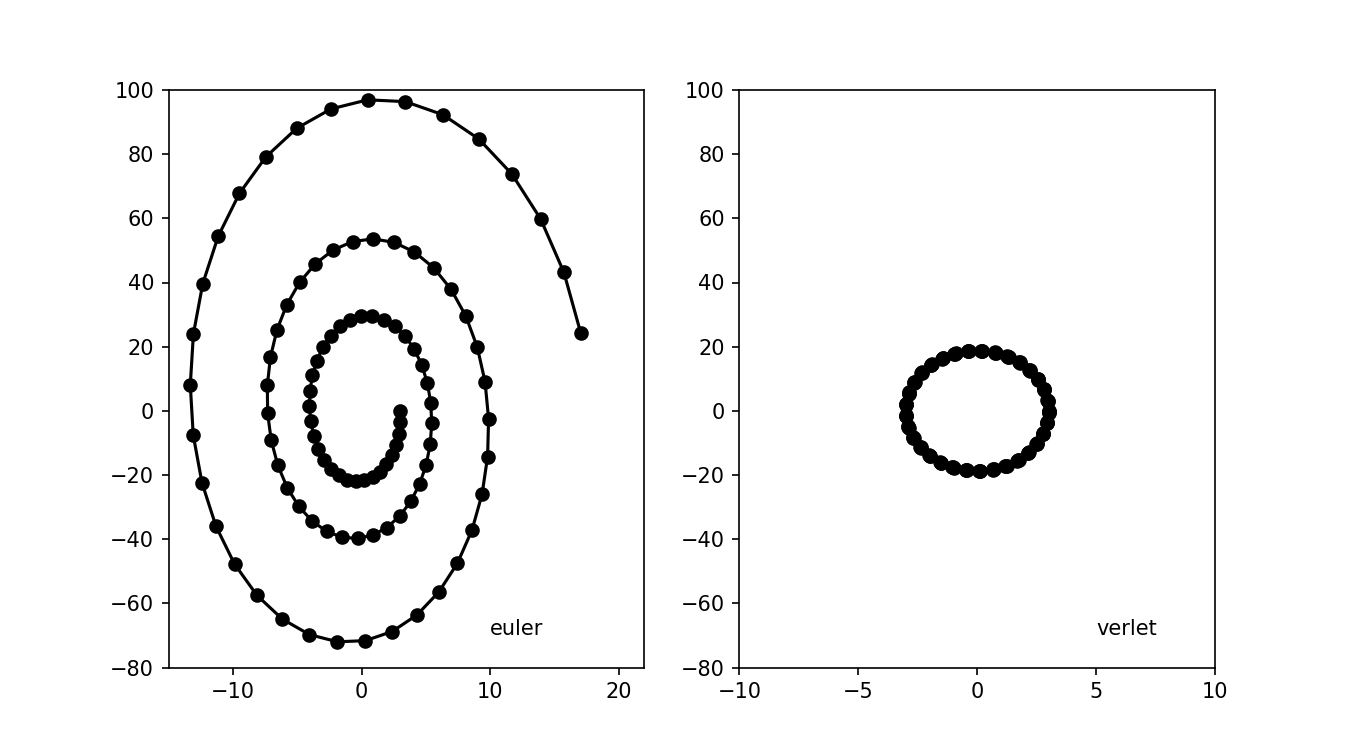

In [7]:
def verlet(y0, z0, f, tmin, tmax, n):
    h = (tmax - tmin) / (n - 1)
    y = [y0]
    z = [z0]
    t = [tmin]
    for i in range(1,n):
        t.append(t[-1] + h)
        y.append(y[-1] + h * z[-1] + h**2 / 2 * f(y[-1]))
        z.append(z[-1] + h / 2 * (f(y[-2]) + f(y[-1])))
    return t,y,z
    
def euler(y0,z0,f,tmin,tmax,n):
    h = (tmax - tmin) / (n - 1)
    y = [y0]
    z = [z0]
    t = [tmin]
    for i in range(1,n):
        t.append(t[-1] + h)
        y.append(y[-1] + h * z[-1])
        z.append(z[-1] + h * f(y[-2]))
    return t,y,z

def f(x):
    w = 2*pi
    return -w**2 * x

te,ye,ze = euler(3,0,f,0,3,100)
tv,yv,zv = verlet(3,0,f,0,3,100)

plt.figure("Figure 1",figsize=(9,5))
plt.clf()
plt.subplot(1,2,1)
plt.plot(ye,ze,"-ok")
plt.text(10,-70,"euler")
plt.xlim([-15,22])
plt.ylim([-80,100])
plt.subplot(1,2,2)
plt.plot(yv,zv,"-ok")
plt.text(5,-70,"verlet")
plt.xlim([-10,10])
plt.ylim([-80,100])
plt.show()

II.C.2.a.  
$$
\begin{array}{rcl}
E_{i+1} - E_i &=& \frac{1}{2}z_{i+1}^2 + \frac{1}{2}\omega^2 y_{i+1}^2 &-& \frac{1}{2}z_i^2 - \frac{1}{2}\omega^2 y_i^2 \\
&=& \frac{1}{2} \left(z_{i+1}^2 - z_i^2\right) &+& \frac{1}{2}\omega^2 \left(y_{i+1}^2 - y_i^2\right) \\
&=& \frac{1}{2} \left(z_{i+1} - z_i\right) \left(z_{i+1} + z_i\right) &+& \frac{1}{2}\omega^2 \left(y_{i+1} - y_i\right) \left(y_{i+1} + y_i\right) \\
&=& \frac{1}{2}\frac{h}{2} \left(-\omega^2 y_i - \omega^2 y_{i+1}\right) \left(2 z_i -\omega^2 \frac{h}{2}( y_i + y_{i+1})\right) &+& \frac{1}{2}\omega^2 \left( h z_i -\omega^2 \frac{h^2}{2} y_i\right) \left(2 y_i + h z_i - \omega^2 \frac{h^2}{2} y_i\right) \\
&=& -\frac{\omega^2 h}{4} \left(2 y_i + h z_i - \omega^2 \frac{h^2}{2} y_i\right) \left(2 z_i -\omega^2 \frac{h}{2}( 2 y_i + h z_i -\omega^2 \frac{h^2}{2}y_i)\right) &+& \frac{1}{2}\omega^2 \left( h z_i -\omega^2 \frac{h^2}{2} y_i\right) \left(2 y_i + h z_i - \omega^2 \frac{h^2}{2} y_i\right)
\end{array}$$

On ne garde que les termes en $h^2$ au maximum les autres sont négligeables en $O(h^3)$  
$$
\begin{array}{rcl}
E_{i+1} - E_i &=& -\frac{\omega^2 h}{4} \left(2 y_i + h z_i \right) \left(2 z_i -\omega^2 h y_i\right) &+& \frac{h}{2}\omega^2 \left( z_i -\omega^2 \frac{h}{2} y_i\right) \left(2 y_i + h z_i\right) + O(h^3) \\
&=& -\omega^2 h y_i z_i -\frac{\omega^2 h^2}{2}z_i^2 + \frac{\omega^4 h^2}{2} y_i^2 &+& \omega^2 h y_i z_i + \frac{\omega^2 h^2}{2} z_i^2 - \frac{\omega^4 h^2}{2} y_i^2 + O(h^3) \\
&=& O(h^3)
\end{array}$$

II.C.2.b.  
On a ici un schéma fermé qui montre donc une conservation de l'énergie. Ceci est en accord avec le résultat de la question précédente, l'écart entre $E_i$ et $E_{i+1}$ tend vers 0 quand le pas tend vers 0. 

II.C.2.c.  
Le schéma de verlet est bien plus adapté que le schéma d'Euler dans le cas du problème physique modélisé ici car il rend compte de la conservation de l'énergie.

### Partie III. Problème à N corps

III.A.1.  
$$\begin{array}{rtl}
\overrightarrow{F_j} &=& \sum_{k \ne j} \overrightarrow{F_{k/j}} \\
&=& G m_j \sum_{k \ne j} \frac{m_k}{r_{jk}^3}\overrightarrow{P_j P_k}
\end{array}$$

In [8]:
# III.A.2.
def rjk(p1,p2):
    s = 0
    for i in range(3):
        s += (p2[i]-p1[i])**2
    return s**0.5
    
def force2(m1, p1, m2, p2):
    k = 6.67e-11*m1*m2/rjk(p1,p2)**3
    F = []
    for i in range(3):
        F.append(k*(p2[i]-p1[i])) # de 1 vers 2 donc F_2/1
    return F

In [9]:
# III.A.3.
def forceN(j, m, pos):
    F = [0, 0, 0]
    pj = pos[j]
    mj = m[j]
    for k in range(len(pos)): # pos est en fait position[-1]
        if k != j:
            mk = m[k]
            pk = pos[k]
            Fksurj = force2(mj,pj,mk,pk)
            for i in range(3):
                F[i] += Fksurj[i]
    return F

III.B.1.  
position[i] est une liste de listes. Il représente la liste des $p_j \forall j$ à l'instant $t_i$. Chaque $p_j$ est un triplet correspondant aux coordonnées cartésiennes de la position de l'astre j (à l'instant $t_i$).  
  
vitesse[i] est une liste de listes. Ilreprésente la liste des $v_j \forall j$ à l'instant $t_i$. Chaque $v_j$ est un triplet correspondant aux coordonnées cartésiennes du vecteur vitesse de l'astre j (à l'instant $t_i$).

In [10]:
# III.B.2.
def pos_suiv(m, pos, vit, h):
    reponse = []
    for j in range(len(pos)):
        F = forceN(j, m, pos)
        v = vit[j]
        p = pos[j]
        for i in range(3):
            p[i] += h*v[i] + h**2/2*F[i]/m[j]
        reponse.append(p)
    return reponse

In [11]:
# III.B.3.
def etat_suiv(m, pos, vit, h):
    pos_s = pos_suiv(m, pos, vit, h)
    vit_s = []
    for j in range(len(pos)):
        F = forceN(j, m, pos)
        F_s = forceN(j, m, pos_s)
        v = vit[j]
        for i in range(3):
            v[i] += h / (2 * m[j]) * (F[i] + F_s[i])
        vit_s.append(v)
    return pos_s, vit_s

III.B.4.a.  
On a ici $ln(\tau_N) = a\times ln(N) + b$. En modélisant les points expérimentaux obtenus par une droite, on peut utiliser les points A(5.5, 1.5) et B (8.5, 7.5). La pente obtenue est de $\frac{y_B -y_A}{x_B-x_A} = \frac{6}{3} = 2$ d'où $ln(\tau_N) = 2\times ln(N) + b$

III.B.4.b.  
$$\begin{array}{rtl}
ln(\tau_N) &=& 2\times ln(N) + b \\
ln(\tau_N) &=& ln(N^2) + b \\
\tau_N &=& k\times N^2 
\end{array}$$  
  
On peut donc estimer la complexité en $O(N^2)$

III.B.5.  
La fonction forceN a une complexité en $O(N)$. Elle comporte un nombre fini d'opérations en temps constant dans une boucle qui les réalise len(pos) = N fois plus quelques opérations en temps constant dont la durée est négligeable devant celle de la boucle.   
  
Ainsi pos_suiv a une complexité en $O(N^2)$ car elle appelle len(pos) = N fois la fonction forceN. Les opérations unitaires réalisées hors de la boucle (O(1)) et dans la boucle (O(N)) ont une durée négligeable devant celle-là.  

La fonction etat_suiv appelle 1 fois la fonction pos_suiv d'où une complexité au moins $O(N^2)$. Elle appelle ensuite  2 N fois forceN à l'intérieur d'une boucle, là aussi complexité en $O(N^2)$. toutes les autres opérations ont des durées négligeables devant celles là. Les deux opératons en $O(N^2)$ sont faites de manière séquentielle d'où une complexité globale de la fonction etat_suiv en $O(N^2)$ conforme au résultat donné par la courbe de la figure 2.  


## III. Mesures de houle

Q1.  
Un échantillon comporte 8 caractères codés sur 8 bits chacuns d'où 64 bits par échantillon ou 8 octets par échantillon.  
A 2Hz on a 2 échantillons par seconde soit $2\times60 = 120$ par minute et donc $120\times20 = 2400$ pour les 20 minutes d'enregistrement.  
Au total cela fait $2400\times8 = 19200$ octets.

Q2.  
On a environ 20 ko par demi heure soit 40 ko par heure.  
En 15 jours à raison de 24h par jour on arrive à moins de 15 Mo. Même si la ligne d'en tête du fichier n'a pas été prise en compte ici, une carte de 1Go est largement suffisante.

Q3.  
En procédant ainsi, on supprime 1 bit sur 8 soit 1/8 de l'espace stocké.

In [12]:
# Q4.  
f = open("donnees.txt","r")
liste_niveaux = f.readlines() # lecture du fichier, on obtient une liste (un élément par ligne)
f.close()

liste_niveaux = liste_niveaux[1:] # on supprime la première ligne
for i in range(len(liste_niveaux)):
    liste_niveaux[i] = float(liste_niveaux[i]) # on convertit chaque str en float
    
#affichage:
print(liste_niveaux)

[0.4256, 0.3174, -0.0825, -1.0, -2.0, 2.0, -2.0, -1.0, 6.0, 4.0, -2.0, -5.0]


Q5.  
Pour $H_1$:  
Le maximum sur $[0, Z_1]$ est d'environ 6  
Le minimum sur $[Z_1, Z_2]$ est d'environ -3  
D'où $H_1 \approx 6 - (-3) = 9 m$  
Le suivant: $H_2 \approx 7 - (-2) = 9 m$  
Et enfin, $H_3 \approx 5 - (-1.25) = 6.25 m$  
$T_1 \approx 15,5 - 3,75 = 11,75 s$  
$T_2 \approx 28,25 - 15,5 = 12,75 s$

In [13]:
# Q6.
def moyenne(L):
    assert type(L) == list
    assert L != []
    s = 0
    for val in L:
        s += val
    return s / len(L)

In [14]:
# Q7.
def integrale_precise(L):
    s = 0
    dt = 0.5 # pas de temps de 0.5s
    for i in range(len(L)-1): # ou 2400-1 car 20 minutes soit 2*60*20 = 2400 mesures
        s += 0.5*(L[i]+L[i+1])*dt
    return s

def moyenne_precise(L):
    return integrale_precise(L) / 1200 # nombre de secondes en 20 minutes

In [15]:
# Q8.
def ind_premier_pzd(L):
    reponse = -1
    m = moyenne_precise(L)
    for i in range(len(L)-1):
        if L[i] > m and L[i+1] < m:
            reponse = i
            break # le break n'est pas conseillé de manière générale
                  # mais il simplifie ici beaucoup l'écriture de la fonction
                  # il est toléré dans ce cas
    return reponse

print(liste_niveaux)
ind_premier_pzd(liste_niveaux)

[0.4256, 0.3174, -0.0825, -1.0, -2.0, 2.0, -2.0, -1.0, 6.0, 4.0, -2.0, -5.0]


1

In [16]:
# Q9.
def ind_dernier_pzd(L):
    reponse = -2
    m = moyenne_precise(L)
    for i in range(len(L)-2,-1,-1): # on balaye à l'envers pour trouver le dernier
        if L[i] > m and L[i+1] < m:
            reponse = i
            break # le break n'est pas conseillé de manière générale
                  # mais il simplifie ici beaucoup l'écriture de la fonction
                  # il est toléré dans ce cas
    return reponse

print(liste_niveaux)
ind_dernier_pzd(liste_niveaux)

[0.4256, 0.3174, -0.0825, -1.0, -2.0, 2.0, -2.0, -1.0, 6.0, 4.0, -2.0, -5.0]


9

In [17]:
# Q10.
def construction_successeurs(liste_nouveaux):
    n = len(liste_nouveaux)
    successeurs = []
    m = moyenne(liste_nouveaux)
    for i in range(n-1):
        if L[i] > m and L[i+1] < m:
            successeurs.append(i+1)
    return successeurs

In [18]:
# Q11.
def decompose_vagues(liste_niveaux):
    i1 = ind_premier_pzd(liste_niveaux)
    i2 = ind_dernier_pzd(liste_niveaux)
    m = moyenne_precise(liste_niveaux)
    reponse = []
    temp = []
    for i in range(i1+1,i2+1):
        temp.append(liste_niveaux[i])
        if liste_niveaux[i] > m and liste_niveaux[i+1] < m:
            reponse.append(temp)
            temp = []
    return reponse
           
print(liste_niveaux)
decompose_vagues(liste_niveaux)

[0.4256, 0.3174, -0.0825, -1.0, -2.0, 2.0, -2.0, -1.0, 6.0, 4.0, -2.0, -5.0]


[[-0.0825, -1.0, -2.0, 2.0], [-2.0, -1.0, 6.0, 4.0]]

In [19]:
# Q12.
def proprietes(liste_niveaux):
    l = decompose_vagues(liste_niveaux)
    reponse = []
    for vague in l:
        H = max(vague) - min(vague)
        T = len(vague)/2
        reponse.append([H,T])
    return reponse

proprietes(liste_niveaux)

[[4.0, 2.0], [8.0, 2.0]]

In [20]:
# Q13.
def hmax(liste_niveaux):
    l = proprietes(liste_niveaux)
    h = l[0][0]
    for i in range(1,len(l)):
        if l[i][0] > h:
            h = l[i][0]
    return h

hmax(liste_niveaux)

8.0

In [21]:
# Q14.
def triRapide(liste, g, d):
    pivot = liste[d][0]
    i = g
    j = d
    while True:
        while i <= d and liste[i][0] < pivot:
            i = i+1
        while j >= g and liste[j][0] > pivot:
            j = j-1
        if i > j:
            break
        if i < j:
            liste[i], liste[j] = liste[j], liste[i]
        i = i+1
        j = j-1
    if g < j:
        triRapide(liste, g, j)
    if i < d:
        triRapide(liste, i, d)
    return liste

triRapide([[1,2],[0,2],[8,2],[7,2],[2, 3],[3,2],[9,2],[6,2],[5,2],[4,2]],0,9)

[[0, 2],
 [1, 2],
 [2, 3],
 [3, 2],
 [4, 2],
 [5, 2],
 [6, 2],
 [7, 2],
 [8, 2],
 [9, 2]]

g doit prendre l'indice 0 et d l'indice len(liste)-1. On peut prendre le premier élément ou le dernier de la liste comme pivot.


In [22]:
# Q15. et Q16.
def triInsertion(liste, g, d):
    for i in range(g+1, d+1):
        j = i-1
        tmp = liste[i]
        while j >= 0 and liste[j][0] > tmp[0]:
            liste[j], liste[j+1] = liste[j+1], liste[j]
            j = j-1
    return liste

def triRapide(liste, g, d):
    if d-g < 15:
        return triInsertion(liste, g, d)
    pivot = liste[d][0]
    i = g
    j = d
    while True:
        while i <= d and liste[i][0] < pivot:
            i = i+1
        while j >= g and liste[j][0] > pivot:
            j = j-1
        if i > j:
            break
        if i < j:
            liste[i], liste[j] = liste[j], liste[i]
        i = i+1
        j = j-1
    if g < j:
        triRapide(liste, g, j)
    if i < d:
        triRapide(liste, i, d)
    return liste

triRapide([[1,2],[0,2],[8,2],[7,2],[2, 3],[3,2],[9,2],[6,2],[5,2],[4,2]],0,9)

[[0, 2],
 [1, 2],
 [2, 3],
 [3, 2],
 [4, 2],
 [5, 2],
 [6, 2],
 [7, 2],
 [8, 2],
 [9, 2]]

In [23]:
# Q17.
def moyenne(L):
    return sum(L)/len(L)

def ecartType(L):
    m = moyenne(L)
    s = 0
    for val in L:
        s += val**2
    s = s/len(L) - m**2
    return s**0.5

def skewness(liste_hauteurs):
    n = len(liste_hauteurs)
    et3 = (ecartType(liste_hauteurs))**3
    S = 0
    for i in range(n):
        S += (liste_hauteurs[i] - moyenne(liste_heuteurs))**3
    S = n/(n-1)/(n-2)*S/et3
    return S

# ici skewness calcule n fois la moyenne => O(n^2) pour la fonction
# en conservant cette valeur dans une variable on passe en O(n)
def skewness2(liste_hauteurs):
    n = len(liste_hauteurs)
    m = moyenne(liste_hauteurs)
    et3 = (ecartType(liste_hauteurs))**3
    S = 0
    for i in range(n):
        S += (liste_hauteurs[i] - m)**3
    S = n/(n-1)/(n-2)*S/et3
    return S

Q18.  
Ce qui fait la complexité du calcul de S ou de celui de K, c'est la somme de n éléments (d'où une boucle à n éléments) et donc une complexité en O(n). Il n'y a pas de raison d'avoir une complexité différente entre le calcul de K et celui de S.

Q20.  
k va de 0 à N-1, il y a donc N $X_k$ à calculer.  
  
Supposons $N = 2^q$ avec q entier.
Pour calculer un $X_k$, il faut calculer $P_k$ et $I_k$ sous la forme d'une somme de $2^{q-1}$ éléments et réaliser un nombre fini d'opérations unitaires indépendant de N (additions, multiplications). Pour calculer $P_k$ ou $I_k$ on applique la même méthode et on divise à nouveau en deux somme de $2^{q-2}$ éléments et ainsi de suite. On s'arrête lorsque l'on obtient une somme d'un seul élément, réalisée en temps constant.  
On a donc $q = log_2(N)$ étapes comportant un nombre fini d'opérations unitaires. Soit une complexité en $O(log(N))$ pour calculer un $X_k$.  
Au final l'algorithme de TFD a une complexité quasi linéaire en $O(Nlog(N))$, plus efficace que l'algorithme naïf nécesitant de calculer une somme de N éléments N fois soit une complexité en $O(N^2)$.

Q21.  


In [24]:
# on peut travailler en complexes avec cmath
1j ** 2 # 1j est la notation du complexe i, donc 1j**2 renvoie -1

(-1+0j)

In [25]:
def TFD(liste_x):
    N = len(liste_x)
    if N == 1:
        return liste_x
    else:
        w = exp(-2*pi*1j/N)
        P = TFD(liste_x[::2]) # on prend du debut à la fin par pas de 2, on a les coefficients pairs
        I = TFD(liste_x[1::2]) # on prend de 1 àla fin par pas de 2, on a les coefficients impairs
        X = []
        for k in range(N//2):
            X.append(P[k] + w**k * I[k])
        for k in range(N//2):
            X.append(P[k] - w**k * I[k])
        return X

<IPython.core.display.Javascript object>


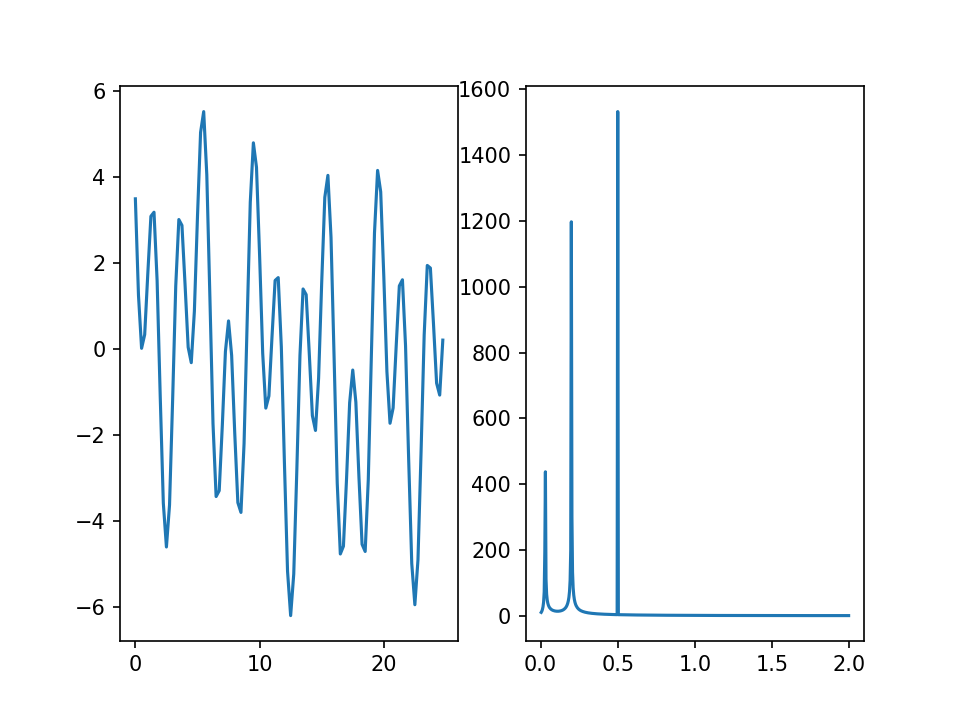

In [26]:
# Test de la fonction sur une somme de sinusoïdes
from math import cos,pi,sin
l = [2.5*cos(2*pi*0.2*t/4) + 1.*cos(2*pi*0.03*t/4) - 3*sin(2*pi*0.5*t/4) for t in range(1024)]
X = TFD(l)
X = [abs(val) for val in X]

plt.figure("sans bruit")
plt.clf()
plt.subplot(1,2,1)
plt.plot([i/4 for i in range(100)],l[:100])
plt.subplot(1,2,2)
plt.plot([4*i/1024 for i in range(1,512)], X[1:512]) # on enlève la partie continue
plt.show()

<IPython.core.display.Javascript object>


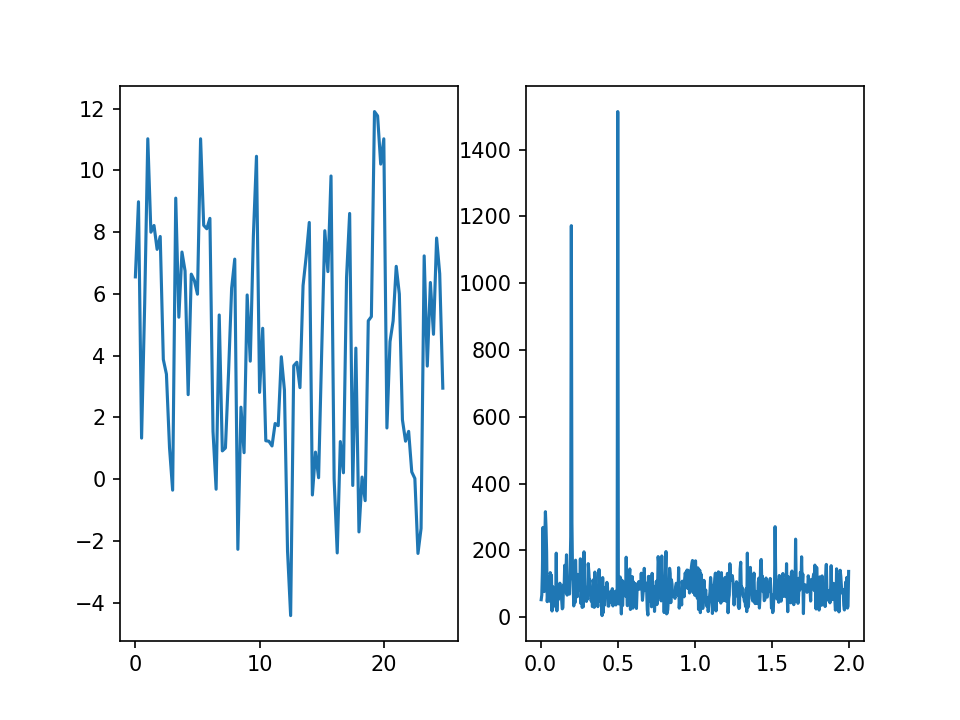

In [29]:
# Test de la fonction sur une somme de sinusoïdes avec du bruit aléatoire
l = [2.5*cos(2*pi*0.2*t/4) + 1.*cos(2*pi*0.03*t/4) - 3*sin(2*pi*0.5*t/4) + 10*random() for t in range(1024)]
X = TFD(l)
X = [abs(val) for val in X]

plt.figure("avec bruit")
plt.clf()
plt.subplot(1,2,1)
plt.plot([i/4 for i in range(100)],l[:100])
plt.subplot(1,2,2)
plt.plot([4*i/1024 for i in range(1,512)], X[1:512]) # on enlève la partie continue
plt.show()